In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
monthly = pd.read_csv('../alt_data/monthly_data.csv')
targets = pd.read_csv('../alt_data/all_targets_data.csv')

In [3]:
monthly['DATE'] = pd.to_datetime(monthly['DATE']).dt.to_period('M')
targets['DATE'] = pd.to_datetime(targets['DATE']).dt.to_period('M')

In [4]:
monthly.set_index('DATE', inplace=True)
targets.set_index('DATE', inplace=True)

In [6]:
project = pd.merge(monthly, targets, how='left', left_index=True, right_index=True)
project.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 554 entries, 1975-01 to 2021-02
Freq: M
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_weeks_unemployed        554 non-null    float64
 1   cont_claims_insur_unemploy  554 non-null    float64
 2   full_employ_level           554 non-null    float64
 3   part_employ_level           554 non-null    float64
 4   not_in_labor_force          554 non-null    float64
 5   gov_unemp_insur             554 non-null    float64
 6   labor_particip_women        554 non-null    float64
 7   labor_particip_men          554 non-null    float64
 8   labor_particip_total        554 non-null    float64
 9   real_estate_loans           554 non-null    float64
 10  consumer_loans              554 non-null    float64
 11  commerc_indust_loans        554 non-null    float64
 12  m1_real                     554 non-null    float64
 13  unemp_less_five_

In [24]:
# project.to_csv('../alt_data/complete_final_data.csv')

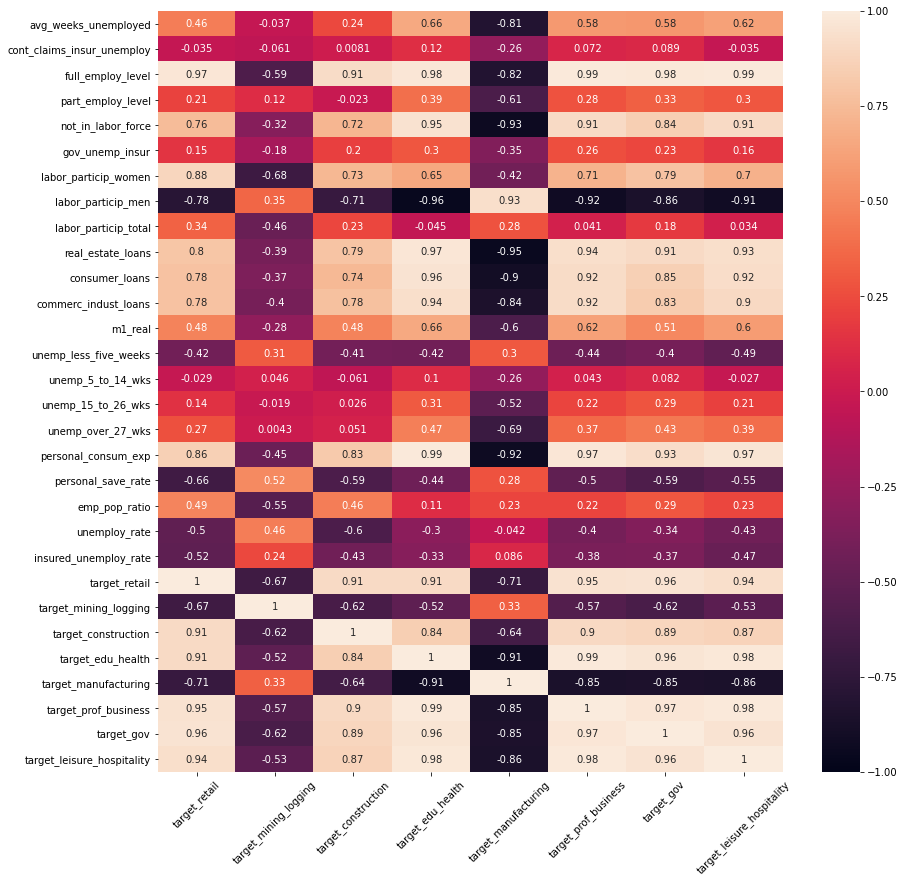

In [22]:
corr = project.corr()[['target_retail', 
                       'target_mining_logging',
                       'target_construction',
                       'target_edu_health',
                       'target_manufacturing',
                       'target_prof_business',
                       'target_gov',
                       'target_leisure_hospitality']]

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45);

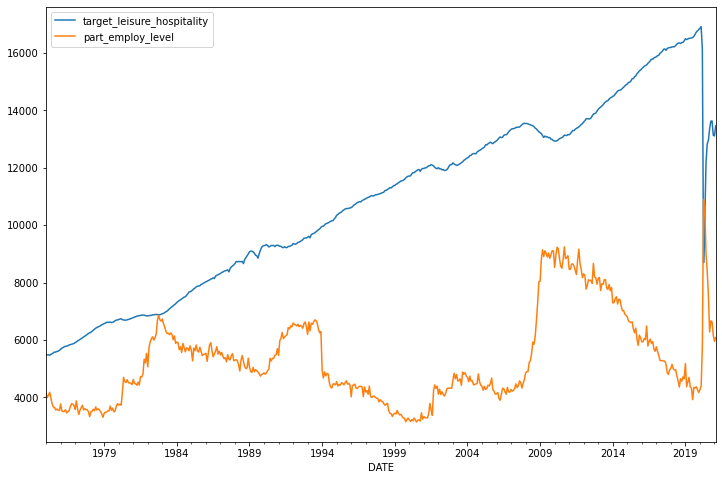

In [23]:
plt.figure(figsize=(12,8))
project['target_leisure_hospitality'].plot(kind='line')
project['part_employ_level'].plot(kind='line')
plt.legend();